In [139]:
import pandas as pd
import os

In [140]:
files=[]
for file in os.listdir('sales data'):   #takes all csv files and append them to the empty list
    files.append(file)
all_df= pd.DataFrame()   #creates an empty dataframe
for file in files:
    df=pd.read_csv('sales data/'+file)   #reads all the csv files from the files list one by one and keeps it as a dataframe 
    all_df=pd.concat([all_df,df])    #concatenates the 'df' to the empty all_df
all_df.drop(index=1,inplace=True)    #because index 1 was showing an Nan value 


In [141]:
all_df.to_csv('all_data.csv',index=False)    #crates a final csv to show all the data of whole 2019 together 
dfr=pd.read_csv('all_data.csv')      # reads the final csv
dfr

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
2,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
3,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001"
...,...,...,...,...,...,...
186833,259353,AAA Batteries (4-pack),3,2.99,09/17/19 20:56,"840 Highland St, Los Angeles, CA 90001"
186834,259354,iPhone,1,700,09/01/19 16:00,"216 Dogwood St, San Francisco, CA 94016"
186835,259355,iPhone,1,700,09/23/19 07:39,"220 12th St, San Francisco, CA 94016"
186836,259356,34in Ultrawide Monitor,1,379.99,09/19/19 17:30,"511 Forest St, San Francisco, CA 94016"





### Clean data

In [142]:
dfr.dropna(axis='index',how='any',inplace= True)   #removes the rows(axis ='index') if any value(how ='any') of that row contains Nan 
dfr

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
2,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
3,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001"
...,...,...,...,...,...,...
186833,259353,AAA Batteries (4-pack),3,2.99,09/17/19 20:56,"840 Highland St, Los Angeles, CA 90001"
186834,259354,iPhone,1,700,09/01/19 16:00,"216 Dogwood St, San Francisco, CA 94016"
186835,259355,iPhone,1,700,09/23/19 07:39,"220 12th St, San Francisco, CA 94016"
186836,259356,34in Ultrawide Monitor,1,379.99,09/19/19 17:30,"511 Forest St, San Francisco, CA 94016"


In [5]:
dfr['Quantity Ordered'].isna().value_counts()

False    186294
Name: Quantity Ordered, dtype: int64

In [6]:
dfr['Price Each'].isna().value_counts()

False    186294
Name: Price Each, dtype: int64

In [143]:

dfr['months']=dfr['Order Date'].str[0:2]    #creating a new column and parsing the months from 'orderdate' column

mylist=['01','02','03','04','05','06','07','08','09','10','11','12']

filt=dfr['months'].isin(mylist)     #returns boolean
dfr['months']=dfr.loc[filt,'months'].astype('int32')     #changing the type from str to int if 'filt' returns true
dfr['Quantity Ordered']=dfr.loc[filt,'Quantity Ordered'].astype(float)   #changing the type from str to float if 'filt' returns true
dfr['Price Each']=dfr.loc[filt,'Price Each'].astype(float)    #changing the type from str to float if 'filt' returns true
dfr

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,months
0,176558,USB-C Charging Cable,2.0,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4.0
1,176559,Bose SoundSport Headphones,1.0,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4.0
2,176560,Google Phone,1.0,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4.0
3,176560,Wired Headphones,1.0,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4.0
4,176561,Wired Headphones,1.0,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4.0
...,...,...,...,...,...,...,...
186833,259353,AAA Batteries (4-pack),3.0,2.99,09/17/19 20:56,"840 Highland St, Los Angeles, CA 90001",9.0
186834,259354,iPhone,1.0,700.00,09/01/19 16:00,"216 Dogwood St, San Francisco, CA 94016",9.0
186835,259355,iPhone,1.0,700.00,09/23/19 07:39,"220 12th St, San Francisco, CA 94016",9.0
186836,259356,34in Ultrawide Monitor,1.0,379.99,09/19/19 17:30,"511 Forest St, San Francisco, CA 94016",9.0


In [144]:
dfr['Price Each'].isna().value_counts()    #still has some nan value since 'filt' didn't returns true for all value of the column

False    185939
True        355
Name: Price Each, dtype: int64

In [145]:
dfr['Quantity Ordered'].isna().value_counts()   #still has some nan value since 'filt' didn't returns true for all value of the column

False    185939
True        355
Name: Quantity Ordered, dtype: int64

### find out the total sales by months

In [146]:
dfr['sale']=dfr['Price Each'] * dfr['Quantity Ordered']   #creating sale column to our dataframe

new_df= dfr.groupby(dfr['months']).sum()    #agg function(.sum()) sums up all the value of every column grouping by months and returns a DF
new_df              #groupby set that column as index in new DF

,Quantity Ordered,Price Each,months,sale
months,,,,
1.0,10902.0,1.811753e+06,9708.0,1.822242e+06
2.0,13448.0,2.188881e+06,23948.0,2.202019e+06
3.0,17004.0,2.791193e+06,45456.0,2.807085e+06
4.0,20558.0,3.367671e+06,73116.0,3.390670e+06
5.0,18666.0,3.135121e+06,82825.0,3.152603e+06
6.0,15252.0,2.560326e+06,81318.0,2.576102e+06
7.0,16071.0,2.632240e+06,100044.0,2.647476e+06
8.0,13447.0,2.230245e+06,95680.0,2.244368e+06
9.0,13107.0,2.084980e+06,104580.0,2.097536e+06


### Vizualising data

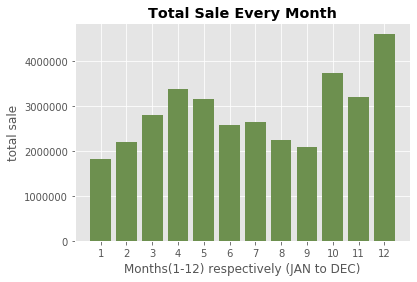

In [149]:
import matplotlib.pyplot as plt
months= new_df.index.to_list()    #converts the index of new_df to list
sales= new_df['sale'].to_list()   #converts sale column's series type to list

plt.bar(months,sales,color='#6d904f')

plt.title('Total Sale Every Month',fontdict={'fontweight':'bold'})
plt.ylabel('total sale')
plt.xlabel('Months(1-12) respectively (JAN to DEC)')
plt.xticks(months)

#plt.grid(True)
plt.show()

### Which city has the most purchase

In [151]:
dfr['city']=dfr['Purchase Address'].str.split(',',expand=True)[1]   #expand returns a DF of the splitted value and puts every value as a column and name those column as int
                                                  #so it keeps the expanded df's 1 column's value in the dfr's 'city' column                  
dfr['city'].value_counts()

 San Francisco    44730
 Los Angeles      29604
 New York City    24875
 Boston           19934
 Atlanta          14881
 Dallas           14818
 Seattle          14731
 Portland         12464
 Austin            9902
Name: city, dtype: int64

In [13]:
#another way to add city column
#def get_city(address):
    #return address.split(',')[1]

#dfr['city1']=dfr['Purchase Address'].apply(lambda x: get_city(x))
#dfr.head()

In [14]:
##another way to add city column
#dfr['city2']=dfr['Purchase Address'].apply(lambda x: x.split(',')[1])
#dfr.head()

In [15]:
dfr['Purchase Address'].str.contains(',').value_counts()

True     185939
False       355
Name: Purchase Address, dtype: int64

In [152]:
#dfr.drop(columns=['city1','city2'],inplace=True)
new_filter=dfr['Purchase Address'].str.contains(',')    #this filter checks if all the str value of that column contains ','
def get_city(address):
    return address.split(',')[1]     #self defined function to pass it in apply method's argument
def get_state(address):
    return address.split(',')[2].split(' ')[1]     #self defined function to pass it in apply method's argument

dfr['city_state']= dfr.loc[ new_filter,'Purchase Address'].apply(lambda x: get_city(x) + ', '+get_state(x)) #creating new city_state column
                                               
dfr.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,months,sale,city,city_state
0,176558,USB-C Charging Cable,2.0,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4.0,23.90,Dallas,"Dallas, TX"
1,176559,Bose SoundSport Headphones,1.0,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4.0,99.99,Boston,"Boston, MA"
2,176560,Google Phone,1.0,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4.0,600.00,Los Angeles,"Los Angeles, CA"
3,176560,Wired Headphones,1.0,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4.0,11.99,Los Angeles,"Los Angeles, CA"
4,176561,Wired Headphones,1.0,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4.0,11.99,Los Angeles,"Los Angeles, CA"


In [153]:
dfr['city_state'].value_counts()

 San Francisco, CA    44730
 Los Angeles, CA      29604
 New York City, NY    24875
 Boston, MA           19934
 Atlanta, GA          14881
 Dallas, TX           14818
 Seattle, WA          14731
 Portland, OR         10009
 Austin, TX            9902
 Portland, ME          2455
Name: city_state, dtype: int64

In [18]:
new_dfr=dfr.groupby('city_state').sum()    #it sums up all the values of every column grouped by 'city_state' column,returns DF
new_dfr

,Quantity Ordered,Price Each,months,sale
city_state,,,,
"Atlanta, GA",16602.0,2.779908e+06,104794.0,2.795499e+06
"Austin, TX",11148.0,1.809835e+06,69806.0,1.819519e+06
"Boston, MA",22528.0,3.637410e+06,141112.0,3.661642e+06
"Dallas, TX",16728.0,2.752524e+06,104607.0,2.767872e+06
"Los Angeles, CA",33288.0,5.421045e+06,208315.0,5.452181e+06
"New York City, NY",27931.0,4.634771e+06,175729.0,4.663717e+06
"Portland, ME",2750.0,4.471893e+05,17144.0,4.497583e+05
"Portland, OR",11302.0,1.860543e+06,70620.0,1.870717e+06
"San Francisco, CA",50237.0,8.209758e+06,315512.0,8.260500e+06


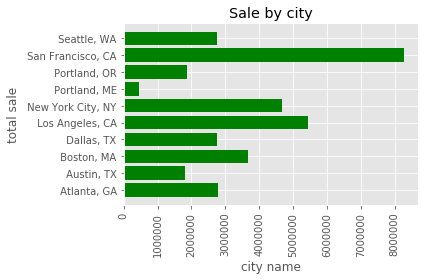

In [154]:
cities=new_dfr.index.to_list()   #converting index of the df to list
sale=new_dfr['sale'].to_list()    #converting series of the df to list
#plt.figure(figsize=(10,5))
plt.style.use('ggplot')

plt.barh(cities,sale,color = 'green')

plt.title('Sale by city')
plt.xticks(rotation='vertical')
plt.xlabel('city name')
plt.ylabel('total sale')
plt.tight_layout()
plt.show()

### In which hour most orders are placed

In [155]:
###converting 'order date' string values to datetime and creating 'date_time' column

fil= dfr['Order Date'].str.contains(':')      #only returns true if contains ':'
dfr['date_time']=pd.to_datetime(dfr.loc[fil,'Order Date'])   #converting 'order date' string values to datetime where fil returns true
dfr['hour'] = dfr['date_time'].dt.hour    #fetches the hour and create a new column
dfr.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,months,sale,city,city_state,date_time,hour
0,176558,USB-C Charging Cable,2.0,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4.0,23.90,Dallas,"Dallas, TX",2019-04-19 08:46:00,8.0
1,176559,Bose SoundSport Headphones,1.0,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4.0,99.99,Boston,"Boston, MA",2019-04-07 22:30:00,22.0
2,176560,Google Phone,1.0,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4.0,600.00,Los Angeles,"Los Angeles, CA",2019-04-12 14:38:00,14.0
3,176560,Wired Headphones,1.0,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4.0,11.99,Los Angeles,"Los Angeles, CA",2019-04-12 14:38:00,14.0
4,176561,Wired Headphones,1.0,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4.0,11.99,Los Angeles,"Los Angeles, CA",2019-04-30 09:27:00,9.0


In [33]:
hour_df=dfr.groupby('hour').count()
hour_df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,months,sale,city,city_state,date_time
hour,,,,,,,,,,,
0.0,3910,3910,3910,3910,3910,3910,3910,3910,3910,3910,3910
1.0,2350,2350,2350,2350,2350,2350,2350,2350,2350,2350,2350
2.0,1243,1243,1243,1243,1243,1243,1243,1243,1243,1243,1243
3.0,831,831,831,831,831,831,831,831,831,831,831
4.0,854,854,854,854,854,854,854,854,854,854,854


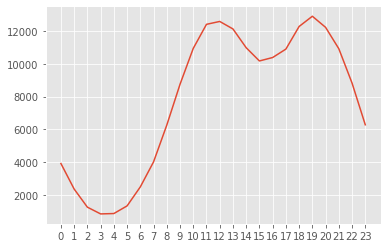

In [156]:
hours=range(0,24)
number_of_order=hour_df['Order ID'].to_list()    #series to list
plt.plot(hours,number_of_order)
plt.xticks(hours)
plt.grid(True)
plt.show()

### find out the products that were often sold together
In this section we are to find which products are mostly sold together 
so that we can make some good packages of those products to attract the customers 
and increase the sale. 

### need some more cleaning

In [158]:
filterby= dfr['Product'] != 'Product'   #returns true if this column has a genuine product name,not 'Product'
current = dfr.loc[filterby]      #takes the rows where 'filterby' returns true
current.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,months,sale,city,city_state,date_time,hour
0,176558,USB-C Charging Cable,2.0,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4.0,23.90,Dallas,"Dallas, TX",2019-04-19 08:46:00,8.0
1,176559,Bose SoundSport Headphones,1.0,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4.0,99.99,Boston,"Boston, MA",2019-04-07 22:30:00,22.0
2,176560,Google Phone,1.0,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4.0,600.00,Los Angeles,"Los Angeles, CA",2019-04-12 14:38:00,14.0
3,176560,Wired Headphones,1.0,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4.0,11.99,Los Angeles,"Los Angeles, CA",2019-04-12 14:38:00,14.0
4,176561,Wired Headphones,1.0,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4.0,11.99,Los Angeles,"Los Angeles, CA",2019-04-30 09:27:00,9.0


In [159]:

dup_in_df = current[current['Order ID'].duplicated(keep = False)]   #retruns a DF the values where 'Oreder ID' from 'current' DF is repeated

dup_in_df['grouped'] = current.groupby('Order ID')['Product'].transform(lambda x:
                                                                  ','.join(x)) #creates a column where it keeps the products together in a singl row for the same 'Order ID'

dup_in_df=dup_in_df[['Order ID','grouped']].drop_duplicates()   #it removes the duplicated rows and returns a df with only 2 col

dup_in_df

C:\Users\ASUS\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,Order ID,grouped
2,176560,"Google Phone,Wired Headphones"
17,176574,"Google Phone,USB-C Charging Cable"
29,176585,"Bose SoundSport Headphones,Bose SoundSport Hea..."
31,176586,"AAA Batteries (4-pack),Google Phone"
118,176672,"Lightning Charging Cable,USB-C Charging Cable"
...,...,...
186769,259296,"Apple Airpods Headphones,Apple Airpods Headphones"
186771,259297,"iPhone,Lightning Charging Cable,Lightning Char..."
186779,259303,"34in Ultrawide Monitor,AA Batteries (4-pack)"
186791,259314,"Wired Headphones,AAA Batteries (4-pack)"


In [160]:
from itertools import combinations     #this library is required to show which products are sold together
from collections import Counter     #this library is required to count the combinations here

count= Counter()

for item in dup_in_df['grouped']:    #loops through a series
    item_list = item.split(',')
    count.update(Counter(combinations(item_list,2)))   #the 2nd parameter of combinations takes the number of how many products of combo we want

count.most_common(10)       #Counter libraray's most_common() method shows the top result




[(('iPhone', 'Lightning Charging Cable'), 1004),
 (('Google Phone', 'USB-C Charging Cable'), 987),
 (('iPhone', 'Wired Headphones'), 447),
 (('Google Phone', 'Wired Headphones'), 414),
 (('Vareebadd Phone', 'USB-C Charging Cable'), 361),
 (('iPhone', 'Apple Airpods Headphones'), 360),
 (('Google Phone', 'Bose SoundSport Headphones'), 220),
 (('USB-C Charging Cable', 'Wired Headphones'), 160),
 (('Vareebadd Phone', 'Wired Headphones'), 143),
 (('Lightning Charging Cable', 'Wired Headphones'), 91)]

### The most sold product

In [120]:
product_group= current.groupby('Product')    
#quantity= product_group.sum()['Quantity Ordered']
#quantity.sort_values(ascending=False)
product_group.sum()    #agg functions on groupby of a DF returns a DF

,Quantity Ordered,Price Each,months,sale,hour
Product,,,,,
20in Monitor,4129.0,451068.99,29336.0,454148.71,58764.0
27in 4K Gaming Monitor,6243.0,2429247.71,44430.0,2434707.57,90899.0
27in FHD Monitor,7550.0,1125974.93,52558.0,1132424.50,107540.0
34in Ultrawide Monitor,6199.0,2348718.19,43304.0,2355558.01,89076.0
AA Batteries (4-pack),27633.0,79008.00,145551.0,106110.72,298321.0
AAA Batteries (4-pack),31017.0,61716.59,146370.0,92740.83,297332.0
Apple Airpods Headphones,15661.0,2332350.00,109477.0,2349150.00,223304.0
Bose SoundSport Headphones,13456.0,1332266.76,94105.0,1345465.44,192430.0
Flatscreen TV,4818.0,1439700.00,34217.0,1445400.00,68807.0


### plotting the aanlysis

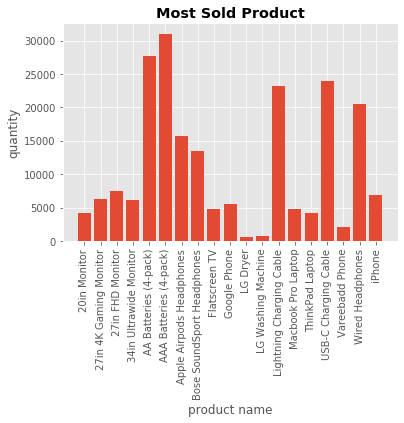

In [130]:
product_name= product_group.sum().index.to_list()    #converts the mosnths to list
quantity= product_group.sum()['Quantity Ordered'].to_list()   #converts sale column's series type to list


plt.bar(product_name,quantity)

plt.title('Most Sold Product',fontdict={'fontweight':'bold'})
plt.ylabel('quantity')
plt.xlabel('product name')
plt.xticks(rotation='vertical')

plt.grid(True)
plt.show()

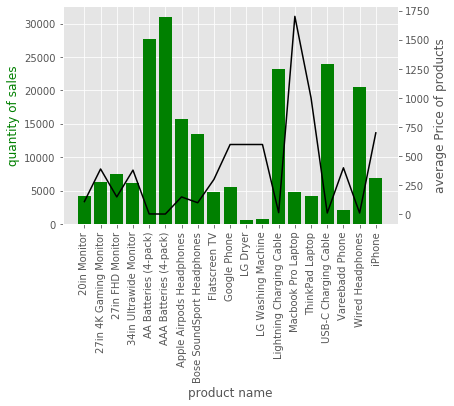

In [165]:
prices= current.groupby('Product').mean()['Price Each']     #retunrs a list of average product price.

fig,ax1=plt.subplots()
ax2=ax1.twinx()     #creates another indentical axis on ax1

ax1.bar(product_name,quantity,color='green')
ax2.plot(product_name,prices,color='k')

ax1.set_xlabel('product name')     #we have to call set_xlabel() method instead of xlabel()
ax1.set_ylabel('quantity of sales',color='green')   #we have to call set_ylabel() method instead of ylabel()
ax2.set_ylabel('average Price of products')
ax1.set_xticklabels(product_name,rotation='vertical')

plt.grid(False)
plt.show()
